# Understanding Mall customers

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in k$
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)


You have one day to perform this analysis

In [158]:
 #import library
import pandas as pd
import numpy as np

#viz
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-learn library
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [18]:
mall_df = pd.read_csv('data/Mall_Customers.csv')
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [21]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 

# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

# 

# Clustering methods somary

* [K-Means Clustering](#chapter1)
* [DBSCAN Model](#chapter2)
* [Gaussian mixture model](#chapter3)

## K-Means Clustering <a class="anchor" id="chapter1"></a>

In [22]:
mall_df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [48]:
#tranform column Gender in two colonnes : Male and Female
#mall_df_map = pd.get_dummies(mall_df, columns= ['Gender'], prefix= '0')

# Encode labels in column 'species'.
mall_df['Gender'] = LabelEncoder().fit_transform(mall_df['Gender'])

mall_df['Gender'].unique()

LabelEncoder().fit_transform(mall_df['Gender'])

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [47]:
mall_df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [49]:
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


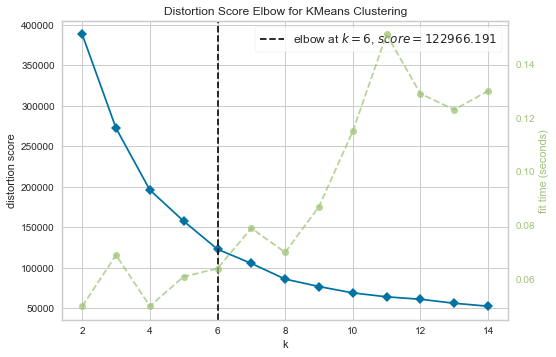

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
#Model k-mean
#i use the elbow to know the number of clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k =(2,15))
visualizer.fit(mall_df)
visualizer.show()

In [97]:
#cluters = 8
# I try to use the K-Means Clustering model with eigth clusters
kmn = KMeans(n_clusters=6, random_state=42)

In [98]:
#creat new column clusters
mall_df["clusters"]= kmn.fit_predict(mall_df)

In [99]:
mall_df['clusters'].value_counts()

2    45
5    42
3    35
1    34
0    22
4    22
Name: clusters, dtype: int64

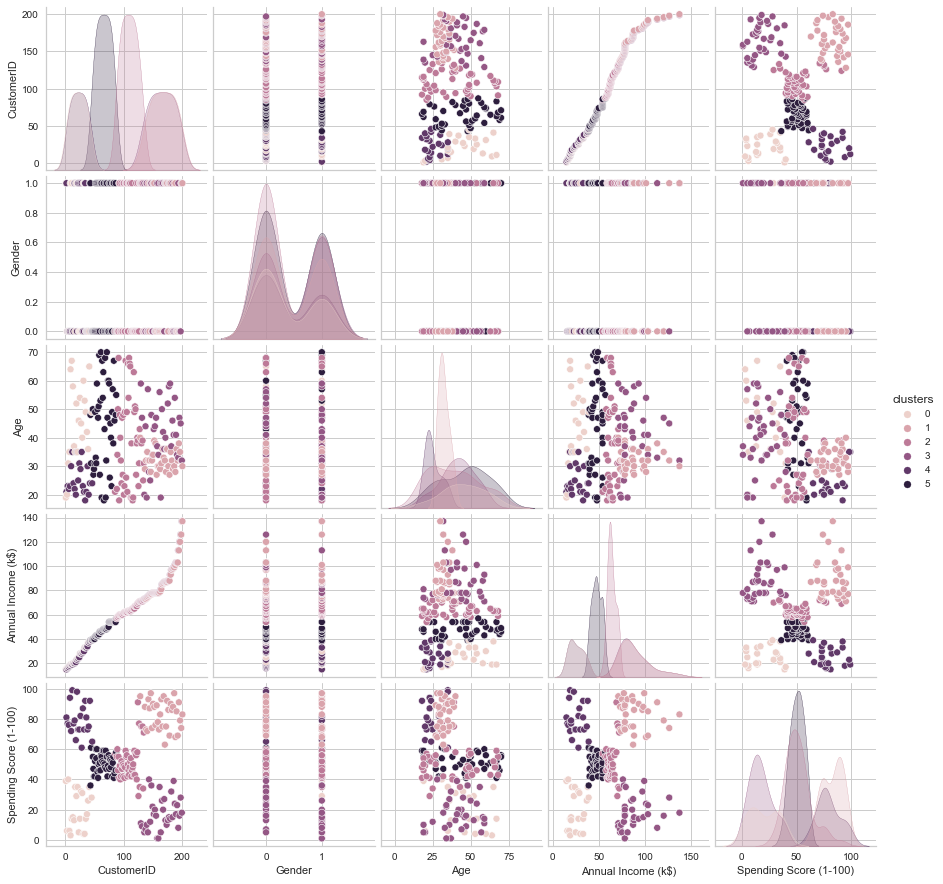

In [100]:
sns.pairplot(mall_df,hue = 'clusters')

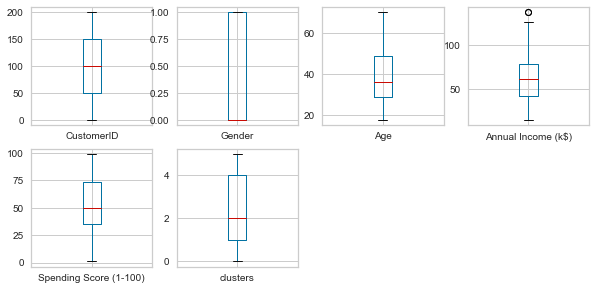

In [137]:
mall_df.plot(kind='box', subplots=True, layout=(4, 4), figsize = (10, 10));

C:\Users\Simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


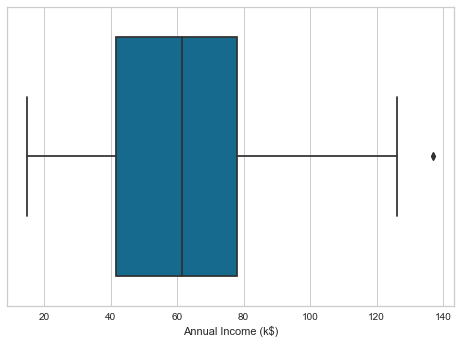

In [139]:
sns.boxplot(mall_df['Annual Income (k$)'])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

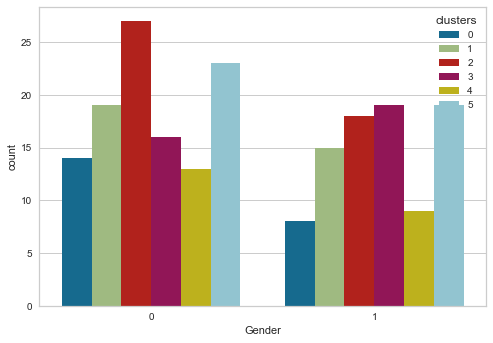

In [255]:
sns.countplot(x= "Gender", hue='clusters', data=mall_df)

# 

## DBSCAN Model <a class="anchor" id="chapter2"></a>

In [184]:
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


In [185]:
X = mall_df[['Gender', 'Annual Income (k$)', 'Spending Score (1-100)', 'clusters']]

In [186]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   clusters                200 non-null    int32
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


In [210]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [211]:
X_scaled

array([[ 1.12815215, -1.73899919, -0.43480148, -1.60012457],
       [ 1.12815215, -1.73899919,  1.19570407,  0.82890703],
       [-0.88640526, -1.70082976, -1.71591298, -1.60012457],
       [-0.88640526, -1.70082976,  1.04041783,  0.82890703],
       [-0.88640526, -1.66266033, -0.39597992, -1.60012457],
       [-0.88640526, -1.66266033,  1.00159627,  0.82890703],
       [-0.88640526, -1.62449091, -1.71591298, -1.60012457],
       [-0.88640526, -1.62449091,  1.70038436,  0.82890703],
       [ 1.12815215, -1.58632148, -1.83237767, -1.60012457],
       [-0.88640526, -1.58632148,  0.84631002,  0.82890703],
       [ 1.12815215, -1.58632148, -1.4053405 , -1.60012457],
       [-0.88640526, -1.58632148,  1.89449216,  0.82890703],
       [-0.88640526, -1.54815205, -1.36651894, -1.60012457],
       [-0.88640526, -1.54815205,  1.04041783,  0.82890703],
       [ 1.12815215, -1.54815205, -1.44416206, -1.60012457],
       [ 1.12815215, -1.54815205,  1.11806095,  0.82890703],
       [-0.88640526, -1.

In [212]:
X_normalized

,0,1,2,3
0,0.424998,-0.655117,-0.163799,-0.602800
1,0.445467,-0.686668,0.472141,0.327306
2,-0.292505,-0.561257,-0.566234,-0.528025
3,-0.379761,-0.728683,0.445744,0.355127
4,-0.354071,-0.664143,-0.158173,-0.639163
...,...,...,...,...
195,-0.310133,0.793799,0.391185,-0.347382
196,-0.317046,0.893405,-0.308259,0.079279
197,0.368921,0.816816,0.302145,-0.324681
198,0.334169,0.864242,-0.370278,0.065655


In [213]:
#reduce the dimension with PCA
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal.head()

,P1,P2
0,-0.346678,-0.260921
1,-0.575462,0.556898
2,0.308950,-0.111015
3,0.206410,0.805796
4,0.411555,-0.089503


In [214]:
# building the clustering model
# Numpy array of all the cluster labels assigned to each data point
from numpy import unique

db_default = DBSCAN(eps = 0.375, min_samples = 3).fit(X_principal)
labels = db_default.labels_
unique(labels)

array([0, 1, 2, 3], dtype=int64)

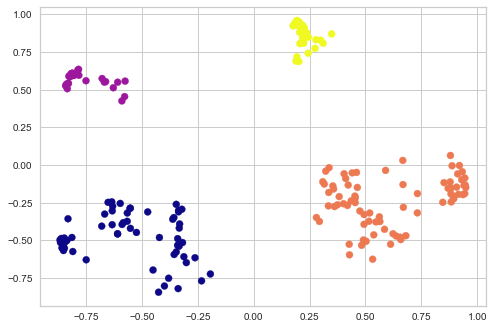

In [215]:
X_principal['cluster'] = labels
# X_principal
plt.scatter(data=X_principal, x='P1', y='P2', c='cluster', cmap="plasma")

In [223]:
#testing with two columns

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()

X_scaled1 = scaler.fit_transform(X[['Annual Income (k$)','Spending Score (1-100)']])
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized1 = normalize(X_scaled1)
  
# Converting the numpy array into a pandas DataFrame
X_normalized1 = pd.DataFrame(X_normalized1)
X_normalized1

,0,1
0,-0.970136,-0.242563
1,-0.824010,0.566575
2,-0.703978,-0.710221
3,-0.853054,0.521823
4,-0.972792,-0.231681
...,...,...
195,0.896995,0.442040
196,0.945312,-0.326169
197,0.937891,0.346931
198,0.919188,-0.393819


In [224]:
#reduce the dimension with PCA
pca = PCA(n_components = 2)
X_principal1 = pca.fit_transform(X_normalized1)
X_principal1 = pd.DataFrame(X_principal1)
X_principal1.columns = ['P1', 'P2']
X_principal1.head()

,P1,P2
0,-0.363554,-0.836063
1,-0.914915,-0.226099
2,0.169294,-0.911011
3,-0.897225,-0.276430
4,-0.373792,-0.831518


In [225]:
db_default1 = DBSCAN(eps = 0.375, min_samples = 3).fit(X_principal1)
labels = db_default1.labels_
unique(labels)

array([0, 1], dtype=int64)

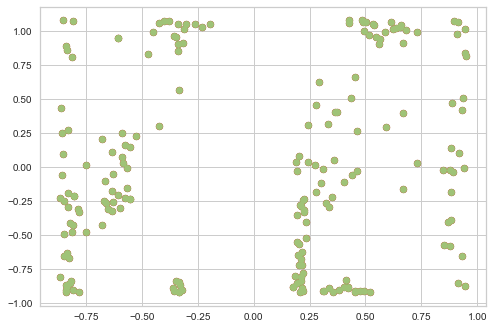

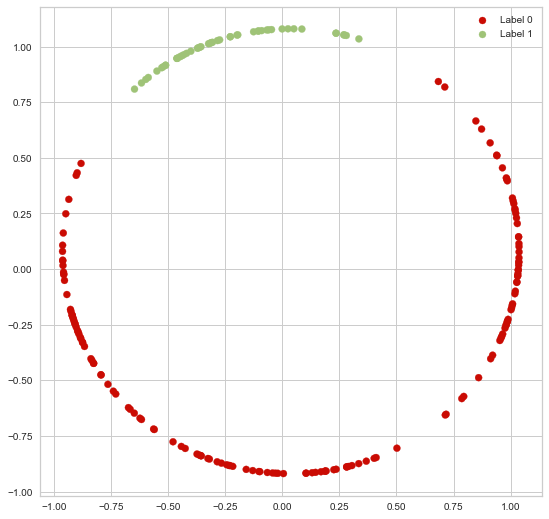

In [227]:
# visualizing the clustering
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]

# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal1['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal1['P2'], color ='g');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal1['P1'], X_principal1['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g), ('Label 0', 'Label 1'))
  
plt.show()

# 

## Gaussian mixture model <a class="anchor" id="chapter3"></a>

In [231]:
mall_go = mall_df.drop(['clusters', 'CustomerID'], axis=1)
mall_go

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [236]:
# Fit the GMM model for the dataset 
# mixture of 3 Gaussian Distribution
gm = GaussianMixture(n_components=2, random_state=0).fit(mall_go)
gm.means_

array([[ 0.60068551, 40.28226635, 89.7725311 , 14.63833631],
       [ 0.4136898 , 38.61548466, 55.77682075, 56.02276871]])

C:\Users\Simplon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Simplon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Simplon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Simplon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Wi

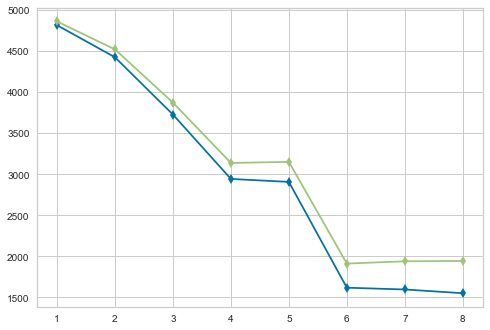

In [256]:
bic = []
aic = []
for i in range(8):
    gm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                     max_iter = 100)
    gm.fit(X)
    bic.append(gm.bic(X))
    aic.append(gm.aic(X))

# Look at the plots

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8], aic, marker = "d", label = 'aic')
plt.plot([1,2,3,4,5,6,7,8], bic, marker = "d", label = 'bic')
plt.show()

# 

In [248]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(mall_go)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [257]:
# plt.scatter(mall_go[:,0], mall_go[:,1], c=cluster.labels_, cmap='rainbow')

# Conclusions